<a href="https://colab.research.google.com/github/whdigrace/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8F%89%EA%B0%80_%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class MYDummyClassifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    pred = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
      if x['Sex'].iloc[i] == 0:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
path = '/content/drive/MyDrive/titanic_train.csv'
df = pd.read_csv(path)

In [6]:
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]

In [7]:
data['Sex'] = pd.get_dummies(data['Sex'])['female'].values

<ipython-input-7-bb01d747e6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female'].values


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [10]:
model = MYDummyClassifier()
model.fit(x_train,y_train)

In [11]:
pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test,pred)

0.7847533632286996

In [14]:
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()

In [16]:
np.unique(digits.target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [17]:
data = digits.data
label = (digits.target==7).astype(int)

In [18]:
np.unique(label,return_counts=True)

(array([0, 1]), array([1618,  179]))

In [19]:
class MySecondClassifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    return np.zeros((len(x),1),dtype=bool)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [21]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.9155555555555556

In [22]:
d = data[0].reshape(8,-1)
d

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [23]:
for y in range(8):
  for x in range(8):
    if d[y][x] !=0:
      print("■",end="")
    else:
      print("  ",end="")
  print()

    ■■■■    
    ■■■■■  
  ■■■  ■■  
  ■■    ■■  
  ■■    ■■  
  ■■  ■■■  
  ■■■■■    
    ■■■      


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

## 오차 행렬

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
confusion_matrix(y_test,pred) #로지스틱 회귀 모델로 실행한 결과

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[412,   0],
       [  0,  38]])

In [28]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
confusion_matrix(y_test,pred)

array([[412,   0],
       [ 38,   0]])

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [30]:
def model_evaluate(actual , pred, print_flag=True):
  confusion = confusion_matrix(actual , pred)
  accuracy = accuracy_score(actual , pred)
  precision = precision_score(actual , pred)
  recall = recall_score(actual , pred)
  if print_flag:
    print(f"accuracy:{accuracy:.3f} ")
    print(f"precision:{precision:.3f} ")
    print(f"recall:{recall:.3f} ")
  return  confusion,accuracy,precision, recall

In [31]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [32]:
model_evaluate(y_test,pred)

accuracy:0.916 
precision:0.000 
recall:0.000 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([[412,   0],
        [ 38,   0]]),
 0.9155555555555556,
 0.0,
 0.0)

In [33]:
_,acc,_,_ = model_evaluate(y_test,pred,print_flag=False)
acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9155555555555556

In [34]:
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]
data['Sex'] = pd.get_dummies(data['Sex'])['female'].values

<ipython-input-34-03841b96478e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female'].values


In [35]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [36]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
re = model_evaluate(y_test,pred)

accuracy:0.812 
precision:0.807 
recall:0.720 


In [37]:
model = MYDummyClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
re = model_evaluate(y_test,pred)

accuracy:0.812 
precision:0.787 
recall:0.753 


In [39]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred_proba = model.predict_proba(x_test)
pred_proba.shape

(223, 2)

In [40]:
pred_proba[0], pred[0]

(array([0.0311614, 0.9688386]), array([1.]))

In [41]:
from sklearn.preprocessing import Binarizer

In [42]:
x = [[1,2,1],
     [4,0,2],
     [1,2,3]]
binar = Binarizer(threshold=2)
bx = binar.fit_transform(x)
bx

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [43]:
binar = Binarizer(threshold=0.3)
ppx = binar.fit_transform(pred_proba)
ppx

array([[0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [44]:
ct = 0.5
pp1 = pred_proba[:,1].reshape(-1,1)
bn = Binarizer(threshold=ct)
cp = bn.fit_transform(pp1)
d = model_evaluate(y_test,cp)

accuracy:0.812 
precision:0.807 
recall:0.720 


In [45]:
ct = 0.4
pp1 = pred_proba[:,1].reshape(-1,1)
bn = Binarizer(threshold=ct)
cp = bn.fit_transform(pp1)
d = model_evaluate(y_test,cp)

accuracy:0.776 
precision:0.717 
recall:0.763 


In [46]:
def get_eval_by_thresholds(y_test,pred,thresholds):
  for threshold in thresholds:
    print("=== threshold:",threshold)
    bn = Binarizer(threshold=threshold)
    pv = bn.fit_transform(pred)
    model_evaluate(y_test,pv)

In [47]:
tvs = [0.4, 0.45, 0.5 ,0.55, 0.60]
get_eval_by_thresholds(y_test,pp1,tvs)

=== threshold: 0.4
accuracy:0.776 
precision:0.717 
recall:0.763 
=== threshold: 0.45
accuracy:0.812 
precision:0.800 
recall:0.731 
=== threshold: 0.5
accuracy:0.812 
precision:0.807 
recall:0.720 
=== threshold: 0.55
accuracy:0.812 
precision:0.815 
recall:0.710 
=== threshold: 0.6
accuracy:0.812 
precision:0.870 
recall:0.645 


In [49]:
path = '/content/drive/MyDrive/titanic_train.csv'
df = pd.read_csv(path)
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]
data['Sex'] = pd.get_dummies(data['Sex'])['female']
x_train, x_test, y_train, y_test = train_test_split(data,label)

<ipython-input-49-7c458225c39a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female']


In [50]:
from sklearn.metrics import precision_recall_curve

In [52]:
model = LogisticRegression()
model.fit(x_train,y_train)
pp1 = model.predict_proba(x_test)
ppc1 = pp1[:,1]
ppc1

array([0.48340821, 0.79924204, 0.62317233, 0.79941398, 0.10500091,
       0.92068957, 0.11767991, 0.46013777, 0.46264555, 0.11839731,
       0.11742575, 0.242189  , 0.11783901, 0.505401  , 0.42532916,
       0.11793455, 0.11812984, 0.1176733 , 0.22149444, 0.12000508,
       0.78703825, 0.24359704, 0.45534466, 0.78037353, 0.57760867,
       0.22360375, 0.11793455, 0.11785359, 0.77188866, 0.42450591,
       0.45462822, 0.42708308, 0.2793343 , 0.11823756, 0.09838267,
       0.11784697, 0.62270473, 0.90156721, 0.21330617, 0.10507288,
       0.45010879, 0.93528685, 0.24275155, 0.46013777, 0.60619074,
       0.11769979, 0.21993224, 0.11744029, 0.10619169, 0.09583061,
       0.24475576, 0.7981834 , 0.24359704, 0.92989299, 0.48340821,
       0.0736988 , 0.11789474, 0.11789474, 0.11767991, 0.58996183,
       0.11758455, 0.62307941, 0.44333394, 0.45891685, 0.44421906,
       0.44291827, 0.4553698 , 0.60134284, 0.2441618 , 0.42825125,
       0.62307941, 0.11793455, 0.44594312, 0.11761633, 0.77932

In [53]:
prec, rec, thres = precision_recall_curve(y_test,ppc1)

In [54]:
s = pd.Series(thres)
s.describe()

count    153.000000
mean       0.436227
std        0.283545
min        0.040053
25%        0.118034
50%        0.447223
75%        0.623172
max        0.948023
dtype: float64

In [57]:
ti = np.arange(0,thres.shape[0],15)
ti

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150])

In [58]:
print(np.round(thres[ti],2))

[0.04 0.11 0.12 0.21 0.25 0.45 0.47 0.59 0.63 0.9  0.94]


In [62]:
for i in ti:
  print(f"th:{thres[i]:.2f} {prec[i]:.2f} {rec[i]:.2f} ")
print("threshold:",np.round(thres[ti],2))
print("precison:",np.round(prec[ti],2))
print("recall:",np.round(rec[ti],2))

th:0.04 0.35 1.00 
th:0.11 0.37 0.97 
th:0.12 0.39 0.94 
th:0.21 0.47 0.86 
th:0.25 0.57 0.83 
th:0.45 0.62 0.73 
th:0.47 0.71 0.69 
th:0.59 0.86 0.64 
th:0.63 0.92 0.44 
th:0.90 1.00 0.26 
th:0.94 1.00 0.04 
threshold: [0.04 0.11 0.12 0.21 0.25 0.45 0.47 0.59 0.63 0.9  0.94]
precison: [0.35 0.37 0.39 0.47 0.57 0.62 0.71 0.86 0.92 1.   1.  ]
recall: [1.   0.97 0.94 0.86 0.83 0.73 0.69 0.64 0.44 0.26 0.04]


In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [66]:
plt.plot(thres,prec[:last],'r-',label='precision')
plt.plot(thres,rec[:last],'b-',label='recall')
plt.grid()
plt.legend()
plt.show()

NameError: ignored

In [67]:
from sklearn.metrics import f1_score

In [68]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
f1 = f1_score(y_test,pred)
print("f1:",f1)

f1: 0.7123287671232876


In [69]:
def get_model_eval(actual,pred):
  con = confusion_matrix(actual,pred)
  acc = accuracy_score(actual,pred)
  pre = precision_score(actual,pred)
  rec = recall_score(actual,pred)
  f1 = f1_score(actual,pred)
  print("오차행렬\n",con)
  print(f"정확도:{acc:6.4f} 정밀도{pre:6.4f}")
  print(f"재현율:{rec:6.4f} F1 점수{f1:6.4f}")

In [70]:
def get_eval_by_thresholds(y_test,pred,thresholds):
  for threshold in thresholds:
    print("=== threshold:",threshold)
    bn = Binarizer(threshold=threshold)
    pv = bn.fit_transform(pred)
    get_model_eval(y_test,pv)

In [73]:
thresholds = np.arange(0,1.01,0.05)
model = LogisticRegression()
model.fit(x_train,y_train)
pp1 = model.predict_proba(x_test)[:,-1].reshape(-1,1)
get_eval_by_thresholds(y_test,pp1,thresholds)

=== threshold: 0.0
오차행렬
 [[  0 146]
 [  0  77]]
정확도:0.3453 정밀도0.3453
재현율:1.0000 F1 점수0.5133
=== threshold: 0.05
오차행렬
 [[  2 144]
 [  0  77]]
정확도:0.3543 정밀도0.3484
재현율:1.0000 F1 점수0.5168
=== threshold: 0.1
오차행렬
 [[ 12 134]
 [  2  75]]
정확도:0.3901 정밀도0.3589
재현율:0.9740 F1 점수0.5245
=== threshold: 0.15000000000000002
오차행렬
 [[72 74]
 [11 66]]
정확도:0.6188 정밀도0.4714
재현율:0.8571 F1 점수0.6083
=== threshold: 0.2
오차행렬
 [[72 74]
 [11 66]]
정확도:0.6188 정밀도0.4714
재현율:0.8571 F1 점수0.6083
=== threshold: 0.25
오차행렬
 [[98 48]
 [13 64]]
정확도:0.7265 정밀도0.5714
재현율:0.8312 F1 점수0.6772
=== threshold: 0.30000000000000004
오차행렬
 [[101  45]
 [ 13  64]]
정확도:0.7399 정밀도0.5872
재현율:0.8312 F1 점수0.6882
=== threshold: 0.35000000000000003
오차행렬
 [[102  44]
 [ 13  64]]
정확도:0.7444 정밀도0.5926
재현율:0.8312 F1 점수0.6919
=== threshold: 0.4
오차행렬
 [[102  44]
 [ 13  64]]
정확도:0.7444 정밀도0.5926
재현율:0.8312 F1 점수0.6919
=== threshold: 0.45
오차행렬
 [[114  32]
 [ 22  55]]
정확도:0.7578 정밀도0.6322
재현율:0.7143 F1 점수0.6707
=== threshold: 0.5
오차행렬
 [[129  17]
 [ 25

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC CURVE

In [74]:
from sklearn.metrics import roc_curve

In [75]:
fprs, tprs, thresholds = roc_curve(y_test,pp1)

In [77]:
ti =np.arange(1,thresholds.shape[0],5)
ti

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81])

In [78]:
for i in ti:
  print(f"th:{thres[i]:.2f} {fprs[i]:.2f} {tprs[i]:.2f} ")
print("threshold:",np.round(thres[ti],2))
print("fpr:",np.round(fprs[ti],2))
print("tpr:",np.round(tprs[ti],2))

th:0.06 0.00 0.01 
th:0.10 0.00 0.26 
th:0.10 0.02 0.44 
th:0.11 0.03 0.55 
th:0.12 0.05 0.65 
th:0.12 0.10 0.68 
th:0.12 0.15 0.69 
th:0.12 0.24 0.71 
th:0.12 0.28 0.78 
th:0.22 0.35 0.83 
th:0.22 0.47 0.84 
th:0.24 0.56 0.87 
th:0.28 0.67 0.92 
th:0.43 0.77 0.94 
th:0.44 0.86 0.94 
th:0.45 0.92 0.99 
th:0.45 1.00 1.00 
threshold: [0.06 0.1  0.1  0.11 0.12 0.12 0.12 0.12 0.12 0.22 0.22 0.24 0.28 0.43
 0.44 0.45 0.45]
fpr: [0.   0.   0.02 0.03 0.05 0.1  0.15 0.24 0.28 0.35 0.47 0.56 0.67 0.77
 0.86 0.92 1.  ]
tpr: [0.01 0.26 0.44 0.55 0.65 0.68 0.69 0.71 0.78 0.83 0.84 0.87 0.92 0.94
 0.94 0.99 1.  ]


In [80]:
def roc_curve_plot(y_test,pred):
  fprs, tprs, thresholds = roc_curve(y_test,pp1)
  plt.plot(fprs,tprs,label="ROC")
  plt.plot([0,1],[0,1],'k--',label='Random')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

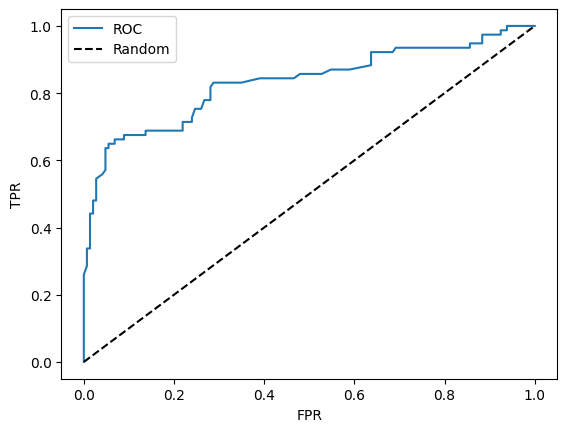

In [83]:
roc_curve_plot(y_test,pred)

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
roc_auc_score(y_test,pp1)

0.8323696851094112